## Restructuring csv file  

### General csv info
- There are 39,900+ songs
- There are a columns that are not important
- Duplicates make 9812 records and 5368 unique song names

### Process Outline
- Create column with unique identifiers
- Analyze duplicate song titles
- Create additional summary statistics per song
    - ###
- Validate if weeks on chart matches weekly record
    - does the difference belong due times when the song is on the top 100 after week 92+
- Restructure song records from row to column structure for easier plotting


Find songs with the same year and Rank = typically should be the same song with different collaborators
Find song name duplicates - could be a re-release in a different year or could be a cover by a different artist



## Contents
<a href='#dependencies'>Dependencies and Read Data</a>  
<a href='#clean'>Data Cleaning</a>  
<a href='#analysis'>Analysis</a>  
<a href='#unique_song_names'>Unique Song Names</a>  
<a href='#weekly_stats'>Weekly Stats Check</a>  
<a href='#composers'>Song Composers</a>    
<a href='#weekly_pivot_data'>Weekly Data Pivoted for Plotting</a>    
<a href='#unique_records'>Checks for Unique Records</a>  

In [453]:
# Top artist analysis

# Artists who are also writers

# Artists who collaborate with other artists the most
# make this a category

# merge track_data with this dataset
#  - by name/track, artists

## Dependencies and Read Data
<span id='dependencies'>

In [454]:
# dependencies and settings

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

plt.rcParams["figure.figsize"] = (16,9)
pd.set_option('display.max_columns', 30)
pd.set_option('display.max_rows', 30)

In [455]:
# encoding may be needed
# determined encodings with terminal:  `file --exclude encoding Billboard.csv`
# include parse_dates to simplify data cleaning
# Note:  after parsing dates, many null columns were not imported for some reason; this was desired

df = pd.read_csv("./data/Billboard.csv", 
                 low_memory=False, encoding="ISO-8859-1", 
                 parse_dates=['Date Entered', 'Date Peaked']
                )
df.head()

,Year,Yearly Rank,Source,Prefix,CH,40,10,PK,High,Verified,Artist,Artist Inverted,Featured,UnFeatured,Album,...,77th Week,78th Week,79th Week,80th Week,81st Week,82nd Week,83rd Week,84th Week,85th Week,86th Week,87th Week,88th Week,89th Week,90th Week,91st Week
0,2015,262,h,2015-001,25.0,1.0,0.0,1.0,39,NaN,Milky Chance,Milky Chance,NaN,NaN,Stolen Dance - EP,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,298,h,2015-002,34.0,27.0,2.0,2.0,10,NaN,Fall Out Boy,Fall Out Boy,NaN,NaN,American Beauty / American Psycho,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,301,h,2015-003,32.0,25.0,10.0,1.0,7,NaN,Nick Jonas,"Jonas, Nick",NaN,NaN,Nick Jonas (Deluxe Version),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,304,h,2015-004,16.0,5.0,0.0,1.0,18,NaN,Meghan Trainor,"Trainor, Meghan",NaN,NaN,Title - EP,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,308,h,2015-005,20.0,0.0,0.0,1.0,44,NaN,Florida Georgia Line,Florida Georgia Line,NaN,NaN,Anything Goes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Clean dataframe
<span id='clean'>

In [456]:
# check data quality
df.dtypes.head(30)

# Note:  Several columns should be numerical or time
# ie - Yearly Rank, High, Time, date columns

Year                 int64
Yearly Rank         object
Source              object
Prefix              object
CH                 float64
40                 float64
10                 float64
PK                 float64
High                object
Verified            object
Artist              object
Artist Inverted     object
Featured            object
UnFeatured          object
Album               object
B-Side              object
Track               object
Time                object
Time Source         object
explicit            object
Time (Album)        object
Artist ID          float64
SYMBL               object
ReIssue             object
Label/Number        object
Media               object
Stereo (55-68)      object
Pic Sleeve          object
Genre               object
Comments            object
dtype: object

In [457]:
# Fix Yearly Rank so 'n/a' text values are labled as -1
df['Yearly Rank'].replace('n/a', int(-1), inplace=True);
df['Yearly Rank'] = df['Yearly Rank'].fillna(-1);
df['High'].replace([None, '--'], -1, inplace=True);
df['Date Entered'].replace("+", "", inplace=True);
df['Date Peaked'].replace("+", "", inplace=True);
pd.to_datetime(df['Time'], format='%M:%S');

# Conversion not needed
# df['Date Entered'] = pd.to_datetime(df['Date Entered'], format='%m/%d/%Y')
# df['Date Entered'].value_counts().tail(20)

In [458]:
# Check modified columns
df[ ~df['Date Entered'].apply(lambda x: isinstance(x, datetime))]

,Year,Yearly Rank,Source,Prefix,CH,40,10,PK,High,Verified,Artist,Artist Inverted,Featured,UnFeatured,Album,...,77th Week,78th Week,79th Week,80th Week,81st Week,82nd Week,83rd Week,84th Week,85th Week,86th Week,87th Week,88th Week,89th Week,90th Week,91st Week


In [459]:
# check Yearly Rank values
df['Yearly Rank'].value_counts().tail(30)

# Note:  notice that some of the Yearly Rank values have letters (a,b)
# I think these a,b values represent the same song with different featured artists included
# with the main/primary artist

# This does not represent the same song sung by different artists in one year (ie White Christmas)


290b    1
307b    1
314b    1
492b    1
509b    1
35a     1
288a    1
204b    1
164b    1
165b    1
48b     1
43b     1
111b    1
53b     1
59b     1
67b     1
78b     1
118b    1
171b    1
305b    1
286b    1
325b    1
418b    1
11b     1
49a     1
33b     1
33a     1
28b     1
201b    1
146b    1
Name: Yearly Rank, dtype: int64

In [460]:
# view all records that are not real numbers (not integer or not float or not imaginary)
df[ ~df['Yearly Rank'].apply(lambda x: np.isreal(x))]

# Similar to method above; below is probably the more official way (more specific)
# df[ ~df['Yearly Rank'].apply(lambda x: isinstance(x, (int, float)))]

# Below shows that we have text values for the entire Yearly Rank column

,Year,Yearly Rank,Source,Prefix,CH,40,10,PK,High,Verified,Artist,Artist Inverted,Featured,UnFeatured,Album,...,77th Week,78th Week,79th Week,80th Week,81st Week,82nd Week,83rd Week,84th Week,85th Week,86th Week,87th Week,88th Week,89th Week,90th Week,91st Week
0,2015,262,h,2015-001,25.0,1.0,0.0,1.0,39,NaN,Milky Chance,Milky Chance,NaN,NaN,Stolen Dance - EP,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,298,h,2015-002,34.0,27.0,2.0,2.0,10,NaN,Fall Out Boy,Fall Out Boy,NaN,NaN,American Beauty / American Psycho,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,301,h,2015-003,32.0,25.0,10.0,1.0,7,NaN,Nick Jonas,"Jonas, Nick",NaN,NaN,Nick Jonas (Deluxe Version),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,304,h,2015-004,16.0,5.0,0.0,1.0,18,NaN,Meghan Trainor,"Trainor, Meghan",NaN,NaN,Title - EP,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,308,h,2015-005,20.0,0.0,0.0,1.0,44,NaN,Florida Georgia Line,Florida Georgia Line,NaN,NaN,Anything Goes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39977,1891,12,m,1891_012,3.0,NaN,NaN,3.0,2,NaN,Dan Kelly,"Kelly, Dan",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39978,1891,13,m,1891_013,2.0,NaN,NaN,2.0,2,NaN,Dan Kelly,"Kelly, Dan",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39979,1890,1,m,1890_001,6.0,NaN,NaN,6.0,1,NaN,U.S. Marine Band,U.S. Marine Band,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39980,1890,2,m,1890_002,6.0,NaN,NaN,6.0,1,NaN,U.S. Marine Band,U.S. Marine Band,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [461]:
# first remove any NaN Values with 0
# A zero or negative 1 should be considered as ignoreable values
df['Yearly Rank'] = df['Yearly Rank'].replace(np.nan, 0)

In [462]:
# Maybe make this a separate column
# Note:  I had to add 'inplace=True' to make this work
# df['Yearly Rank'] = df['Yearly Rank'].replace('^[A-Za-z]+$', '', regex=True, inplace=True)
df['Yearly Rank'] = df['Yearly Rank'].str.extract('(\d+)').astype(float)
#  df[df['Yearly Rank'].str.contains('[A-Za-z]', na=False)]

In [463]:
df.dtypes.head(30)

Year                 int64
Yearly Rank        float64
Source              object
Prefix              object
CH                 float64
40                 float64
10                 float64
PK                 float64
High                object
Verified            object
Artist              object
Artist Inverted     object
Featured            object
UnFeatured          object
Album               object
B-Side              object
Track               object
Time                object
Time Source         object
explicit            object
Time (Album)        object
Artist ID          float64
SYMBL               object
ReIssue             object
Label/Number        object
Media               object
Stereo (55-68)      object
Pic Sleeve          object
Genre               object
Comments            object
dtype: object

In [464]:
# Not needed anymore using the above method (astype)
#  df['Yearly Rank'] = pd.to_numeric(df['Yearly Rank'])

In [465]:
# check for column format changes
df[ ~df['Yearly Rank'].apply(lambda x: isinstance(x, (int, float)))]

# Note:  shows that column is consistent data type

,Year,Yearly Rank,Source,Prefix,CH,40,10,PK,High,Verified,Artist,Artist Inverted,Featured,UnFeatured,Album,...,77th Week,78th Week,79th Week,80th Week,81st Week,82nd Week,83rd Week,84th Week,85th Week,86th Week,87th Week,88th Week,89th Week,90th Week,91st Week


In [466]:
df.head()

,Year,Yearly Rank,Source,Prefix,CH,40,10,PK,High,Verified,Artist,Artist Inverted,Featured,UnFeatured,Album,...,77th Week,78th Week,79th Week,80th Week,81st Week,82nd Week,83rd Week,84th Week,85th Week,86th Week,87th Week,88th Week,89th Week,90th Week,91st Week
0,2015,262.0,h,2015-001,25.0,1.0,0.0,1.0,39,NaN,Milky Chance,Milky Chance,NaN,NaN,Stolen Dance - EP,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,298.0,h,2015-002,34.0,27.0,2.0,2.0,10,NaN,Fall Out Boy,Fall Out Boy,NaN,NaN,American Beauty / American Psycho,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,301.0,h,2015-003,32.0,25.0,10.0,1.0,7,NaN,Nick Jonas,"Jonas, Nick",NaN,NaN,Nick Jonas (Deluxe Version),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,304.0,h,2015-004,16.0,5.0,0.0,1.0,18,NaN,Meghan Trainor,"Trainor, Meghan",NaN,NaN,Title - EP,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,308.0,h,2015-005,20.0,0.0,0.0,1.0,44,NaN,Florida Georgia Line,Florida Georgia Line,NaN,NaN,Anything Goes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Basic Summary Stats
<span id='summary'>

In [467]:
# Look at basic statistics
df.iloc[:, :50].describe()

,Year,Yearly Rank,CH,40,10,PK,Artist ID
count,39982.000000,39948.000000,39929.000000,27942.000000,27832.000000,30358.000000,2302.000000
mean,1967.166575,213.813357,9.274162,4.523549,1.157445,1.545523,7570.439618
std,27.458659,157.172754,7.564290,6.682420,3.088947,1.118186,1278.816779
min,1890.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1172.000000
25%,1949.000000,86.000000,3.000000,0.000000,0.000000,1.000000,7665.000000
50%,1968.000000,185.000000,7.000000,0.000000,0.000000,1.000000,8043.000000
75%,1988.000000,308.000000,14.000000,8.000000,0.000000,2.000000,8167.750000
max,2015.000000,743.000000,87.000000,63.000000,32.000000,17.000000,8445.000000


In [468]:
df_basics = df.iloc[:, :34]
df_basics.head()

,Year,Yearly Rank,Source,Prefix,CH,40,10,PK,High,Verified,Artist,Artist Inverted,Featured,UnFeatured,Album,...,explicit,Time (Album),Artist ID,SYMBL,ReIssue,Label/Number,Media,Stereo (55-68),Pic Sleeve,Genre,Comments,Written By,Temp 1,Date Entered,Date Peaked
0,2015,262.0,h,2015-001,25.0,1.0,0.0,1.0,39,NaN,Milky Chance,Milky Chance,NaN,NaN,Stolen Dance - EP,...,NaN,NaN,8401.0,NaN,NaN,Lichtdicht Digital,DD,NaN,NaN,NaN,NaN,C.Rehbein,1079,2014-08-09,2015-01-03
1,2015,298.0,h,2015-002,34.0,27.0,2.0,2.0,10,NaN,Fall Out Boy,Fall Out Boy,NaN,NaN,American Beauty / American Psycho,...,NaN,NaN,7739.0,NaN,NaN,Decaydance/Island Digital,DD,NaN,NaN,NaN,NaN,"J.R.Rotem,P.V.Stump,P.Wentz,J.Trohman,A.Hurley...",2467,2014-09-27,2015-02-07
2,2015,301.0,h,2015-003,32.0,25.0,10.0,1.0,7,NaN,Nick Jonas,"Jonas, Nick",NaN,NaN,Nick Jonas (Deluxe Version),...,NaN,NaN,8076.0,NaN,NaN,Safehouse/Island Digital,DD,NaN,NaN,NaN,NaN,"N.Jonas,N.Lambrozza,S.Wilcox",2383,2014-09-27,2015-01-24
3,2015,304.0,h,2015-004,16.0,5.0,0.0,1.0,18,NaN,Meghan Trainor,"Trainor, Meghan",NaN,NaN,Title - EP,...,NaN,NaN,8397.0,NaN,NaN,Epic Digital,DD,NaN,NaN,NaN,NaN,"M.Trainor,K.Kadish",583,2014-09-27,2015-05-16
4,2015,308.0,h,2015-005,20.0,0.0,0.0,1.0,44,NaN,Florida Georgia Line,Florida Georgia Line,NaN,NaN,Anything Goes,...,NaN,NaN,8214.0,NaN,NaN,Republic Nashville Digital,DD,NaN,NaN,NaN,NaN,"C.R.Barlowe,J.Frasure,S.Buxton,T.Hubbard,B.Kelley",770,2014-10-04,2015-02-07


In [469]:
print("Dataframe records: ", len(df_basics))
print("Unique records in Prefix column: ", df_basics["Prefix"].nunique())

Dataframe records:  39982
Unique records in Prefix column:  39982


## Analysis
<span id='analysis'>

In [470]:
# Differences in dataset
#  - Find all repeated Tracks
#  - Find Tracks by the same artist (probably different years)
#  - Find Tracks by same artist but with different featured artists
#  - Find Tracks by different artists
#  - Find if Tracks are originals
#  - Find Tracks that are covers(find if Artists = Writer)

In [471]:
# show records where song is repeated
# shows records by the same track name (same artist, song with different featured artists, and covers) 
multiple_hits_on_chart = df [(df.duplicated(subset=['Track'], keep=False)) ][['Track','Year','Artist', 'Yearly Rank','Source','Prefix','CH','40','10','PK','Time']].sort_values(['Track'])
multiple_hits_on_chart.to_csv('data/repeat_songs_on_charts.csv', index=False)

In [472]:
# Tracks by same artist
hit_by_artist = df [(df.duplicated(subset=['Track', 'Artist'], keep=False)) ]
hit_by_artist[['Track','Year','Artist', 'Yearly Rank','Featured']].sort_values(['Track'])

,Track,Year,Artist,Yearly Rank,Featured
10027,(It's Just) The Way That You Love Me,1988,Paula Abdul,354.0,NaN
9333,(It's Just) The Way That You Love Me,1989,Paula Abdul,52.0,NaN
16200,(We're Gonna) Rock Around The Clock,1974,Bill Haley and His Comets,239.0,NaN
27891,(We're Gonna) Rock Around The Clock,1955,Bill Haley and His Comets,3.0,NaN
359,***Flawless,2014,Beyonce,288.0,Featuring Nicki Minaj
...,...,...,...,...,...
6933,Your Loving Arms,1996,Billie Ray Martin,155.0,NaN
7411,Your Loving Arms,1995,Billie Ray Martin,302.0,NaN
973,m.A.A.d city,2013,Kendrick Lamar,399.0,Featuring MC Eiht
1333,m.A.A.d city,2012,Kendrick Lamar,346.0,Featuring MC Eiht


In [473]:
# Tracks by same artist but with different featured artists
hit_with_different_featured = df [(df.duplicated(subset=['Track', 'Artist'], keep=False)) & (~df['Featured'].isna())] 
hit_with_different_featured[['Track','Year','Artist', 'Yearly Rank','Featured']].sort_values(['Track'])

,Track,Year,Artist,Yearly Rank,Featured
358,***Flawless,2014,Beyonce,288.0,Featuring Chimamanda Ngozi Adichie
359,***Flawless,2014,Beyonce,288.0,Featuring Nicki Minaj
831,All Around The World,2013,Justin Bieber,257.0,Featuring Ludacris
1080,All Around The World,2012,Justin Bieber,94.0,Featuring Ludacris
25815,Alvin's Harmonica,1959,David Seville,34.0,and the Chipmunks
...,...,...,...,...,...
2519,Young Forever,2009,Jay-Z,179.0,Featuring Mr. Hudson
1915,Young Forever,2010,Jay-Z,58.0,Featuring Mr. Hudson
973,m.A.A.d city,2013,Kendrick Lamar,399.0,Featuring MC Eiht
1333,m.A.A.d city,2012,Kendrick Lamar,346.0,Featuring MC Eiht


In [474]:
# Tracks by different artists
hit_with_different_artists = df [(df.duplicated(subset=['Track'], keep=False)) ] 
hit_with_different_artists = hit_with_different_artists[~(hit_with_different_artists.duplicated(subset=['Track', 'Artist'], keep=False))]
hit_with_different_artists[['Track','Year','Artist', 'Yearly Rank','Featured','Written By']].sort_values(['Track'])

,Track,Year,Artist,Yearly Rank,Featured,Written By
30206,"""A"" - You're Adorable (The Alphabet Song)",1949,Buddy Kaye Quintet,281.0,NaN,NaN
29969,"""A"" - You're Adorable (The Alphabet Song)",1949,Jo Stafford & Gordon MacRae,43.0,NaN,NaN
29936,"""A"" - You're Adorable (The Alphabet Song)",1949,Perry Como & Fontane Sisters,12.0,NaN,NaN
30037,"""A"" - You're Adorable (The Alphabet Song)",1949,Tony Pastor & His Orchestra,110.0,NaN,NaN
25902,(All Of A Sudden) My Heart Sings,1959,Paul Anka,121.0,NaN,"Jean Marie Blanvillain, Laurent Henri Herpin, ..."
...,...,...,...,...,...,...
33864,Yours and Mine,1937,Teddy Wilson & His Orchestra (Vocal Billie Hol...,277.0,NaN,NaN
30687,Zip-A-Dee-Doo-Dah,1947,Johnny Mercer,91.0,NaN,NaN
30727,Zip-A-Dee-Doo-Dah,1947,Sammy Kaye & His Orchestra,129.0,NaN,NaN
36993,NaN,1924,See 1924_133,134.0,NaN,NaN


In [475]:
df['Written By'].str.split(",", 1, expand=True)[0]

0          C.Rehbein
1          J.R.Rotem
2            N.Jonas
3          M.Trainor
4        C.R.Barlowe
            ...     
39977            NaN
39978            NaN
39979            NaN
39980            NaN
39981            NaN
Name: 0, Length: 39982, dtype: object

In [476]:
# Artist column - remove "xxxx, The" and move "The " to the beginning
def text_rearrange(x):
    test_list = x.split(",", 10)
    test_word = " The"
    if (test_word in test_list) & (len(test_list) > 1):
        index = test_list.index(test_word)
        test_list.pop(index)
        test_list[index-1] = "The " + test_list[index-1]
    else:
        pass
    return ",".join(test_list)

In [477]:
df.head(30)

,Year,Yearly Rank,Source,Prefix,CH,40,10,PK,High,Verified,Artist,Artist Inverted,Featured,UnFeatured,Album,...,77th Week,78th Week,79th Week,80th Week,81st Week,82nd Week,83rd Week,84th Week,85th Week,86th Week,87th Week,88th Week,89th Week,90th Week,91st Week
0,2015,262.0,h,2015-001,25.0,1.0,0.0,1.0,39,NaN,Milky Chance,Milky Chance,NaN,NaN,Stolen Dance - EP,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,298.0,h,2015-002,34.0,27.0,2.0,2.0,10,NaN,Fall Out Boy,Fall Out Boy,NaN,NaN,American Beauty / American Psycho,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,301.0,h,2015-003,32.0,25.0,10.0,1.0,7,NaN,Nick Jonas,"Jonas, Nick",NaN,NaN,Nick Jonas (Deluxe Version),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,304.0,h,2015-004,16.0,5.0,0.0,1.0,18,NaN,Meghan Trainor,"Trainor, Meghan",NaN,NaN,Title - EP,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,308.0,h,2015-005,20.0,0.0,0.0,1.0,44,NaN,Florida Georgia Line,Florida Georgia Line,NaN,NaN,Anything Goes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2015,327.0,h,2015-006,20.0,7.0,0.0,1.0,31,NaN,Alesso,Alesso,Featuring Tove Lo,NaN,Single,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2015,329.0,h,2015-007,20.0,2.0,0.0,1.0,38,NaN,Tim McGraw,"McGraw, Tim",NaN,NaN,Sundown Heaven Town (Deluxe Edition),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2015,332.0,h,2015-008,30.0,24.0,21.0,8.0,2,NaN,Ed Sheeran,"Sheeran, Ed",NaN,NaN,X (Deluxe Edition),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2015,338.0,h,2015-009,18.0,0.0,0.0,1.0,72,NaN,Kid Ink,Kid Ink,Featuring Usher & Tinashe,NaN,Full Speed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2015,344.0,h,2015-010,20.0,0.0,0.0,1.0,59,NaN,"Weeknd, The","Weeknd, The",NaN,NaN,Single,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [478]:
df['Artist'].fillna("", inplace=True)
df['Artist'] = df['Artist'].apply(lambda x:  text_rearrange(x))

# Written By column - remove all "&" and "/" and replace with ","
df['Written By'].fillna("", inplace=True)
df['Written By'] = df['Written By'].apply(lambda x:  x.replace(" & ", ","))
df['Written By'] = df['Written By'].apply(lambda x:  x.replace("/", ","))

df['Featured'].fillna("", inplace=True)
df['Featured'] = df['Featured'].apply(lambda x:  x.replace("Featuring ", ""))

In [479]:
df.head(30)

,Year,Yearly Rank,Source,Prefix,CH,40,10,PK,High,Verified,Artist,Artist Inverted,Featured,UnFeatured,Album,...,77th Week,78th Week,79th Week,80th Week,81st Week,82nd Week,83rd Week,84th Week,85th Week,86th Week,87th Week,88th Week,89th Week,90th Week,91st Week
0,2015,262.0,h,2015-001,25.0,1.0,0.0,1.0,39,NaN,Milky Chance,Milky Chance,,NaN,Stolen Dance - EP,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,298.0,h,2015-002,34.0,27.0,2.0,2.0,10,NaN,Fall Out Boy,Fall Out Boy,,NaN,American Beauty / American Psycho,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,301.0,h,2015-003,32.0,25.0,10.0,1.0,7,NaN,Nick Jonas,"Jonas, Nick",,NaN,Nick Jonas (Deluxe Version),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,304.0,h,2015-004,16.0,5.0,0.0,1.0,18,NaN,Meghan Trainor,"Trainor, Meghan",,NaN,Title - EP,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,308.0,h,2015-005,20.0,0.0,0.0,1.0,44,NaN,Florida Georgia Line,Florida Georgia Line,,NaN,Anything Goes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2015,327.0,h,2015-006,20.0,7.0,0.0,1.0,31,NaN,Alesso,Alesso,Tove Lo,NaN,Single,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2015,329.0,h,2015-007,20.0,2.0,0.0,1.0,38,NaN,Tim McGraw,"McGraw, Tim",,NaN,Sundown Heaven Town (Deluxe Edition),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2015,332.0,h,2015-008,30.0,24.0,21.0,8.0,2,NaN,Ed Sheeran,"Sheeran, Ed",,NaN,X (Deluxe Edition),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2015,338.0,h,2015-009,18.0,0.0,0.0,1.0,72,NaN,Kid Ink,Kid Ink,Usher & Tinashe,NaN,Full Speed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2015,344.0,h,2015-010,20.0,0.0,0.0,1.0,59,NaN,The Weeknd,"Weeknd, The",,NaN,Single,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [480]:
artist = "Nhawn Mendes"
writer = "Fall Out Boy, W.Hashmi, J.Young, L.O'Donnell, S.Mendes"

In [481]:
def add_artists(artist_string):
    full_list=[]
    artist_list = artist_string.split(", ")
    for item in artist_list:
        item = item.strip()
        if len(item.split(" ")) < 2:
            full_list.append(item)
        else:
            mod_name = item.split(" ")[0][0]+"."+item.split(" ")[1]
            full_list.append(mod_name)
            full_list.append(item)
    return ",".join(full_list)
 # need to trim blanks at the beginning of artist_string       

In [482]:
any(item in add_artists(artist) for item in writer.split(", "))

False

In [483]:
# problem with `Air Lane Trio & The Skyliners`

In [484]:
df['Artist_and_writer'] = df.apply(lambda x: any(item in add_artists(x['Artist']) for item in x['Written By'].split(", ")), axis=1)

In [485]:
df[['Track','Year','Artist', 'Yearly Rank','Featured','Written By','Artist_and_writer']].head(30)

,Track,Year,Artist,Yearly Rank,Featured,Written By,Artist_and_writer
0,Stolen Dance,2015,Milky Chance,262.0,,C.Rehbein,False
1,Centuries,2015,Fall Out Boy,298.0,,"J.R.Rotem,P.V.Stump,P.Wentz,J.Trohman,A.Hurley...",False
2,Jealous,2015,Nick Jonas,301.0,,"N.Jonas,N.Lambrozza,S.Wilcox",False
3,Dear Future Husband,2015,Meghan Trainor,304.0,,"M.Trainor,K.Kadish",False
4,Sun Daze,2015,Florida Georgia Line,308.0,,"C.R.Barlowe,J.Frasure,S.Buxton,T.Hubbard,B.Kelley",False
5,Heroes (We Could Be),2015,Alesso,327.0,Tove Lo,"A.Lindblad,T.Lo,D.Bowie,B.Eno",False
6,Shotgun Rider,2015,Tim McGraw,329.0,,"H.Lindsey,M.Green,T.Verges",False
7,Thinking Out Loud,2015,Ed Sheeran,332.0,,"E.Sheeran,A.Wadge",False
8,Body Language,2015,Kid Ink,338.0,Usher & Tinashe,"B.T.Collins,M.S.Eriksen,T.E.Hermansen,M.A.Hoib...",False
9,Often,2015,The Weeknd,344.0,,"A.Tesfaye,B.Diehl,J.Quenneville,A.Balshe,D.Sch...",False


In [486]:
# Tracks that are originals(find if Artists = Writer)
df[(df['Artist'] == df['Written By'].str.split(",", 1, expand=True)[0]) ][['Track','Year','Artist', 'Yearly Rank','Featured','Written By']]



,Track,Year,Artist,Yearly Rank,Featured,Written By
11,Outside,2015,Calvin Harris,349.0,Ellie Goulding,"Calvin Harris,E.Goulding"
24,Make Me Wanna,2015,Thomas Rhett,376.0,,"Thomas Rhett,B.Butler,L.McCoy"
66,Irresistible,2015,Fall Out Boy,67.0,,Fall Out Boy
75,Uma Thurman,2015,Fall Out Boy,76.0,,"Fall Out Boy, W.Hashmi, J.Young, L.O'Donnell, ..."
88,Shots,2015,Imagine Dragons,89.0,,Imagine Dragons
...,...,...,...,...,...,...
29575,That's My Boy,1951,Stan Freberg,304.0,,Stan Freberg
29592,The Third Man Theme,1950,Anton Karas,3.0,,Anton Karas
29921,Please Send Me Someone to Love,1950,Percy Mayfield,289.0,,Percy Mayfield
29923,Pink Champagne,1950,Joe Liggins,330.0,,Joe Liggins


In [487]:
# 2797

# Fix this

# Probably not accurate since some original songs by artists are written by others
# Tracks that are covers (find if Artists != Writer)
# Need to fix abrreviated names
df[(df['Artist'] != df['Written By'].str.split(",", 1, expand=True)[0]) &  (~df['Written By'].isna())][['Track','Year','Artist', 'Yearly Rank','Featured','Written By']]

,Track,Year,Artist,Yearly Rank,Featured,Written By
0,Stolen Dance,2015,Milky Chance,262.0,,C.Rehbein
1,Centuries,2015,Fall Out Boy,298.0,,"J.R.Rotem,P.V.Stump,P.Wentz,J.Trohman,A.Hurley..."
2,Jealous,2015,Nick Jonas,301.0,,"N.Jonas,N.Lambrozza,S.Wilcox"
3,Dear Future Husband,2015,Meghan Trainor,304.0,,"M.Trainor,K.Kadish"
4,Sun Daze,2015,Florida Georgia Line,308.0,,"C.R.Barlowe,J.Frasure,S.Buxton,T.Hubbard,B.Kelley"
...,...,...,...,...,...,...
39977,Pat Kelly on a Spree,1891,Dan Kelly,12.0,,
39978,Pat Kelly's Plea in His Own Defense,1891,Dan Kelly,13.0,,
39979,Semper Fidelis,1890,U.S. Marine Band,1.0,,
39980,Washington Post,1890,U.S. Marine Band,2.0,,


In [488]:
# Show records with the same year and ranking
# shows records by the same artist (filter of Year, Yearly Rank)
# but with different featured artists
songs_with_multiple_featured_artists = df[ (df.duplicated(subset=['Year', 'Yearly Rank'], keep=False)) ]
songs_with_multiple_featured_artists.to_csv('data/repeat_songs_with_different_featured_artist.csv', index=False)

## Unique Song Names
<span id='unique_song_names'>

In [489]:
# identify and store track name of duplicates
single_items = []
duplicates = []
for x in df['Track'].values:
    if x in single_items:
        duplicates.append(x)
    else:
        single_items.append(x)
        
len(duplicates)

9812

In [490]:
# Number of duplicated songs (unique)
len(set(duplicates))

5368

In [491]:
# Songs most repeated
pd.Series(list(duplicates)).value_counts().head(30)

White Christmas             33
You                         18
I Love You                  16
Hold On                     15
Always                      15
Angel                       14
Star Dust                   14
Forever                     12
Hold Me                     12
Smile                       12
Happy                       12
Love Me                     12
Body and Soul               12
Stay                        12
Without You                 12
Crazy                       11
Runaway                     11
Cry                         11
St. Louis Blues             11
Home                        10
Alexander's Ragtime Band    10
Tell Me Why                 10
Baby Face                   10
Down Yonder                 10
If                          10
I Need You                  10
Sunshine                     9
Harbor Lights                9
Call Me                      9
After You've Gone            9
dtype: int64

In [492]:
# Get artist name as its own column for only the duplicated songs
df['Primary_Artist'] = df[df['Track'].isin(list(set(duplicates)))]['Artist'].apply(lambda x: str(x).split(",")[0])

# Set all other columns that are empty (not duplicates) aka Nan to empty string
df['Primary_Artist'] = df['Primary_Artist'].replace({np.nan: ""})

df.reset_index(inplace=True)

# function that takes two values and combines them or takes a single value and return it
def text_format(col1, col2):
    if col2 != "":
        text = str(col1) +  " - " + str(col2)
    else: 
        text = str(col1)
    
    return text

# create unique name so that all duplicated songs have artist name appended to the end
df['Track_Adjusted'] = df.apply(lambda x: text_format(x['Track'], x['Primary_Artist'] + " " + str(x['index'])), axis=1)


In [493]:
df

,index,Year,Yearly Rank,Source,Prefix,CH,40,10,PK,High,Verified,Artist,Artist Inverted,Featured,UnFeatured,...,80th Week,81st Week,82nd Week,83rd Week,84th Week,85th Week,86th Week,87th Week,88th Week,89th Week,90th Week,91st Week,Artist_and_writer,Primary_Artist,Track_Adjusted
0,0,2015,262.0,h,2015-001,25.0,1.0,0.0,1.0,39,NaN,Milky Chance,Milky Chance,,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,,Stolen Dance - 0
1,1,2015,298.0,h,2015-002,34.0,27.0,2.0,2.0,10,NaN,Fall Out Boy,Fall Out Boy,,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,,Centuries - 1
2,2,2015,301.0,h,2015-003,32.0,25.0,10.0,1.0,7,NaN,Nick Jonas,"Jonas, Nick",,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,Nick Jonas,Jealous - Nick Jonas 2
3,3,2015,304.0,h,2015-004,16.0,5.0,0.0,1.0,18,NaN,Meghan Trainor,"Trainor, Meghan",,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,,Dear Future Husband - 3
4,4,2015,308.0,h,2015-005,20.0,0.0,0.0,1.0,44,NaN,Florida Georgia Line,Florida Georgia Line,,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,,Sun Daze - 4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39977,39977,1891,12.0,m,1891_012,3.0,NaN,NaN,3.0,2,NaN,Dan Kelly,"Kelly, Dan",,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,,Pat Kelly on a Spree - 39977
39978,39978,1891,13.0,m,1891_013,2.0,NaN,NaN,2.0,2,NaN,Dan Kelly,"Kelly, Dan",,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,,Pat Kelly's Plea in His Own Defense - 39978
39979,39979,1890,1.0,m,1890_001,6.0,NaN,NaN,6.0,1,NaN,U.S. Marine Band,U.S. Marine Band,,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,U.S. Marine Band,Semper Fidelis - U.S. Marine Band 39979
39980,39980,1890,2.0,m,1890_002,6.0,NaN,NaN,6.0,1,NaN,U.S. Marine Band,U.S. Marine Band,,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,,Washington Post - 39980


In [494]:
df.drop('index', inplace=True, axis='columns')

In [495]:
# Example of a song by the same Artist on multiple years and by other artists on the same year
df[ df['Track'] == 'White Christmas' ]

,Year,Yearly Rank,Source,Prefix,CH,40,10,PK,High,Verified,Artist,Artist Inverted,Featured,UnFeatured,Album,...,80th Week,81st Week,82nd Week,83rd Week,84th Week,85th Week,86th Week,87th Week,88th Week,89th Week,90th Week,91st Week,Artist_and_writer,Primary_Artist,Track_Adjusted
24105,1962,286.0,a,1962_286,3.0,1.0,0.0,1.0,38,x,Bing Crosby,"Crosby, Bing",,"John Scott Trotter Orchestra, The Ken Darby Si...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,Bing Crosby,White Christmas - Bing Crosby 24105
24365,1962,546.0,a,1962_546,1.0,0.0,0.0,1.0,88,p,The Drifters,"Drifters, The",,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,The Drifters,White Christmas - The Drifters 24365
24620,1961,125.0,a,1961_125,4.0,3.0,0.0,1.0,12,x,Bing Crosby,"Crosby, Bing",,"John Scott Trotter Orchestra, The Ken Darby Si...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,Bing Crosby,White Christmas - Bing Crosby 24620
25366,1960,188.0,a,1960_188,3.0,2.0,0.0,1.0,26,x,Bing Crosby,"Crosby, Bing",,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,Bing Crosby,White Christmas - Bing Crosby 25366
25758,1960,578.0,a,1960_578,1.0,0.0,0.0,1.0,96,x,The Drifters,"Drifters, The",Clyde McPhatter and Bill Pinckney,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,The Drifters,White Christmas - The Drifters 25758
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31762,1943,49.0,h,1943_042,6.0,NaN,NaN,NaN,6,NaN,Bing Crosby,"Crosby, Bing",,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,Bing Crosby,White Christmas - Bing Crosby 31762
31896,1942,1.0,h,1942_001,17.0,NaN,NaN,11.0,1,NaN,Bing Crosby,"Crosby, Bing",,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,Bing Crosby,White Christmas - Bing Crosby 31896
31986,1942,125.0,h,1942_090,2.0,NaN,NaN,NaN,15,NaN,Gordon Jenkins & His Orchestra,"Jenkins, Gordon",,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,Gordon Jenkins & His Orchestra,White Christmas - Gordon Jenkins & His Orchest...
32009,1942,103.0,h,1942_113,5.0,NaN,NaN,NaN,12,NaN,Charlie Spivak & His Orchestra,"Spivak, Charlie Orch",,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,Charlie Spivak & His Orchestra,White Christmas - Charlie Spivak & His Orchest...


## Weekly Stats Check
<span id='weekly_stats'>

In [496]:
#  - Check CH (weeks on top 100 charts) with number weeks between 1-91 Weeks calculation
#  - Find Min/Max chart Value
#  - Find first week when first on charts
#  - Find last week when on the charts
#  - Find weeks in the top 40, top 25, top 10, top 3, top song

#  - Find 

In [497]:
# # name of columns representing popularity after x weeks published
cols_keep = df.columns
week_columns = [ x for x in cols_keep if "Week" in x]

# 'Number_Week_on_Charts' should equal CH
df["Number_Week_on_Charts"] = df[week_columns].count(axis=1)
df.head()

,Year,Yearly Rank,Source,Prefix,CH,40,10,PK,High,Verified,Artist,Artist Inverted,Featured,UnFeatured,Album,...,81st Week,82nd Week,83rd Week,84th Week,85th Week,86th Week,87th Week,88th Week,89th Week,90th Week,91st Week,Artist_and_writer,Primary_Artist,Track_Adjusted,Number_Week_on_Charts
0,2015,262.0,h,2015-001,25.0,1.0,0.0,1.0,39,NaN,Milky Chance,Milky Chance,,NaN,Stolen Dance - EP,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,,Stolen Dance - 0,25
1,2015,298.0,h,2015-002,34.0,27.0,2.0,2.0,10,NaN,Fall Out Boy,Fall Out Boy,,NaN,American Beauty / American Psycho,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,,Centuries - 1,34
2,2015,301.0,h,2015-003,32.0,25.0,10.0,1.0,7,NaN,Nick Jonas,"Jonas, Nick",,NaN,Nick Jonas (Deluxe Version),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,Nick Jonas,Jealous - Nick Jonas 2,32
3,2015,304.0,h,2015-004,16.0,5.0,0.0,1.0,18,NaN,Meghan Trainor,"Trainor, Meghan",,NaN,Title - EP,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,,Dear Future Husband - 3,16
4,2015,308.0,h,2015-005,20.0,0.0,0.0,1.0,44,NaN,Florida Georgia Line,Florida Georgia Line,,NaN,Anything Goes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,,Sun Daze - 4,20


In [498]:
# comparison of where Chart records do not equal calculated value
# note:  shows that the calculations is more problematic during earlier years
df[ df['Number_Week_on_Charts'] != df['CH'] ]['Year'].value_counts().index.sort_values()

Int64Index([1890, 1891, 1892, 1893, 1894, 1895, 1896, 1897, 1898, 1899, 1900,
            1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911,
            1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922,
            1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933,
            1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944,
            1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955,
            1956, 1957, 1958, 1961, 1962, 1963, 1964, 1965, 1968, 1970, 1972,
            1980, 1995, 1997, 2000, 2009, 2013, 2014],
           dtype='int64')

In [499]:
# Show only Tracks where weeks on top 100 don't match first 91 weeks tracking
weeks_on_chart_conflict = df[ df['Number_Week_on_Charts'] != df['CH'] ]
weeks_on_chart_conflict[weeks_on_chart_conflict["Year"] > 1990]

,Year,Yearly Rank,Source,Prefix,CH,40,10,PK,High,Verified,Artist,Artist Inverted,Featured,UnFeatured,Album,...,81st Week,82nd Week,83rd Week,84th Week,85th Week,86th Week,87th Week,88th Week,89th Week,90th Week,91st Week,Artist_and_writer,Primary_Artist,Track_Adjusted,Number_Week_on_Charts
271,2014,103.0,h,2014_069,28.0,18.0,0.0,1.0,15,NaN,Florida Georgia Line,Florida Georgia Line,Luke Bryan,NaN,Here's To The Good Times,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,,This Is How We Roll - 271,29
640,2013,67.0,h,2013_067,37.0,16.0,0.0,1.0,14,NaN,The Neighbourhood,"Neighbourhood, The",,NaN,I Love You.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,,Sweater Weather - 640,38
2510,2009,170.0,h,2009_170,26.0,1.0,0.0,1.0,39,NaN,The Ting Tings,"Ting Tings, The",,NaN,We Started Nothing,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,,That's Not My Name - 2510,27
5506,2000,51.0,y,2000_051,24.0,21.0,3.0,1.0,8,NaN,Sonique,Sonique,,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,,It Feels So Good - 5506,27
6448,1997,15.0,a,1997_015,65.0,60.0,19.0,2.0,2,t,Jewel,Jewel,,NaN,Pieces Of You - Atlantic 82700,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,,You Were Meant For Me - 6448,57
7186,1995,80.0,b,1995_080b,0.0,NaN,NaN,NaN,-1,NaN,The Rembrandts,"Rembrandts, The",,NaN,LP. - EastWest 61752,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,,This House Is Not A Home - 7186,1
7227,1995,120.0,a,1995_120,18.0,7.0,0.0,1.0,31,NaN,Shania Twain,"Twain, Shania",,NaN,The Woman In Me - Mercury 522886,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,,Any Man Of Mine - 7227,19


In [500]:
# Frequency of conflicted data by year
weeks_on_chart_conflict["Year"].value_counts().head(20)

1953    441
1938    382
1937    379
1954    368
1940    361
1948    358
1941    339
1950    335
1939    329
1947    321
1951    318
1949    315
1952    315
1936    313
1934    308
1935    294
1946    285
1942    281
1945    266
1944    251
Name: Year, dtype: int64

In [501]:
# determine the difference between weeks in top 100 charts and calculated value from first 91 weeks
weeks_on_chart_conflict["Weeks_on_Chart_Difference"] = (weeks_on_chart_conflict['Number_Week_on_Charts'] - weeks_on_chart_conflict['CH'])
weeks_on_chart_conflict.head()

C:\Users\ejwda\AppData\Local\Temp/ipykernel_31292/2705478444.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weeks_on_chart_conflict["Weeks_on_Chart_Difference"] = (weeks_on_chart_conflict['Number_Week_on_Charts'] - weeks_on_chart_conflict['CH'])


,Year,Yearly Rank,Source,Prefix,CH,40,10,PK,High,Verified,Artist,Artist Inverted,Featured,UnFeatured,Album,...,82nd Week,83rd Week,84th Week,85th Week,86th Week,87th Week,88th Week,89th Week,90th Week,91st Week,Artist_and_writer,Primary_Artist,Track_Adjusted,Number_Week_on_Charts,Weeks_on_Chart_Difference
271,2014,103.0,h,2014_069,28.0,18.0,0.0,1.0,15,NaN,Florida Georgia Line,Florida Georgia Line,Luke Bryan,NaN,Here's To The Good Times,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,,This Is How We Roll - 271,29,1.0
640,2013,67.0,h,2013_067,37.0,16.0,0.0,1.0,14,NaN,The Neighbourhood,"Neighbourhood, The",,NaN,I Love You.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,,Sweater Weather - 640,38,1.0
2510,2009,170.0,h,2009_170,26.0,1.0,0.0,1.0,39,NaN,The Ting Tings,"Ting Tings, The",,NaN,We Started Nothing,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,,That's Not My Name - 2510,27,1.0
5506,2000,51.0,y,2000_051,24.0,21.0,3.0,1.0,8,NaN,Sonique,Sonique,,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,,It Feels So Good - 5506,27,3.0
6448,1997,15.0,a,1997_015,65.0,60.0,19.0,2.0,2,t,Jewel,Jewel,,NaN,Pieces Of You - Atlantic 82700,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,,You Were Meant For Me - 6448,57,-8.0


In [502]:
# Frequency of differences between the two metrics
weeks_on_chart_conflict["Weeks_on_Chart_Difference"].value_counts()

-1.0     3406
-2.0     1774
-3.0     1286
-4.0     1112
-5.0      802
         ... 
 5.0        1
 12.0       1
-38.0       1
-33.0       1
-36.0       1
Name: Weeks_on_Chart_Difference, Length: 42, dtype: int64

In [503]:
# create dataframe that summarizes the differences
year_list = weeks_on_chart_conflict.groupby("Weeks_on_Chart_Difference")['Year'].apply(set)
year_counts = year_list.apply(len)
year_min= year_list.apply(min)
year_max = year_list.apply(max)

In [504]:
summary = pd.DataFrame({'Year List':year_list, 'Year Count': year_counts, 'Min Year': year_min, 'Max Year':year_max})
summary

,Year List,Year Count,Min Year,Max Year
Weeks_on_Chart_Difference,,,,
-38.0,{1952},1,1952,1952
-36.0,{1943},1,1943,1943
-34.0,"{1943, 1951}",2,1943,1951
-33.0,{1944},1,1944,1944
-32.0,"{1948, 1951}",2,1948,1951
...,...,...,...,...
2.0,"{1970, 1957}",2,1957,1970
3.0,"{2000, 1964}",2,1964,2000
5.0,{1965},1,1965,1965


## Song Composers
<span id='composers'>

In [505]:
# Top song writer analysis
# Steps:  1) create dictionary of the top writers
#         2) find their songs
#         3) average ranking
#         4) number weeks on charts

In [506]:
# list of writers
writers = df['Written By'].str.split(",", 10, expand=True)
writers

,0,1,2,3,4,5,6,7,8,9,10
0,C.Rehbein,None,None,None,None,None,None,None,None,None,None
1,J.R.Rotem,P.V.Stump,P.Wentz,J.Trohman,A.Hurley,M.J.Fonseca,R.Kumari,J.Trantner,S.Vega,None,None
2,N.Jonas,N.Lambrozza,S.Wilcox,None,None,None,None,None,None,None,None
3,M.Trainor,K.Kadish,None,None,None,None,None,None,None,None,None
4,C.R.Barlowe,J.Frasure,S.Buxton,T.Hubbard,B.Kelley,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...
39977,,None,None,None,None,None,None,None,None,None,None
39978,,None,None,None,None,None,None,None,None,None,None
39979,,None,None,None,None,None,None,None,None,None,None
39980,,None,None,None,None,None,None,None,None,None,None


In [507]:
# total number of writers per song
writers.count(axis=1)

0        1
1        9
2        3
3        2
4        5
        ..
39977    1
39978    1
39979    1
39980    1
39981    1
Length: 39982, dtype: int64

In [508]:
writers.head()

,0,1,2,3,4,5,6,7,8,9,10
0,C.Rehbein,None,None,None,None,None,None,None,None,None,None
1,J.R.Rotem,P.V.Stump,P.Wentz,J.Trohman,A.Hurley,M.J.Fonseca,R.Kumari,J.Trantner,S.Vega,None,None
2,N.Jonas,N.Lambrozza,S.Wilcox,None,None,None,None,None,None,None,None
3,M.Trainor,K.Kadish,None,None,None,None,None,None,None,None,None
4,C.R.Barlowe,J.Frasure,S.Buxton,T.Hubbard,B.Kelley,None,None,None,None,None,None


## Dictionary of writers

In [509]:
# # test code
# # make a dictionary of each writer
# writer_count = {'C.Rehbein': 0}

# for x in writers.iterrows():
#     if ('C.Rehbein' in x[1].values):
#         writer_count['C.Rehbein'] += 1

# print(writer_count)

In [510]:
# songs by writer
# 2nd attempt, optimized

writer_count = {}
    
for row in writers.iterrows():
    for name in list(row[1]):
        if name == None:
            pass
        elif name in writer_count:
            writer_count[name] += 1
        else:
            writer_count[name] = 1

In [511]:
len(writer_count)

24419

In [547]:
# test code won't work with elif since it will always be a new name and why do some of the names show as None
writer_info =[]

    
for row in writers.iterrows():
    writer_content = {}
    for name in list(row[1]):
        if name == None:
            pass
        elif name in writer_content:
            writer_content['total_songs_recorded'] += 1
            row_id = row[0]
            track_name = df.iloc[row_id, list(df.columns).index("Track")]
            track_ranking = df.iloc[row_id, list(df.columns).index("Yearly Rank")]
        
            writer_content["name"] = name
            writer_content["row_id"] = row_id
            writer_content["track"] = track_name
            writer_content["track_ranking"] = track_ranking
            writer_info.append(writer_content)
            
        else:
            writer_content['total_songs_recorded'] = 1
            row_id = row[0]
            track_name = df.iloc[row_id, list(df.columns).index("Track")]
            track_ranking = df.iloc[row_id, list(df.columns).index("Yearly Rank")]
        
            writer_content["name"] = name
            writer_content["row_id"] = row_id
            writer_content["track"] = track_name
            writer_content["track_ranking"] = track_ranking
            writer_info.append(writer_content)
        
        

In [549]:
writer_info[0:9]

[{'total_songs_recorded': 1,
  'name': 'C.Rehbein',
  'row_id': 0,
  'track': 'Stolen Dance',
  'track_ranking': 262.0},
 {'total_songs_recorded': 1,
  'name': 'S.Vega',
  'row_id': 1,
  'track': 'Centuries',
  'track_ranking': 298.0},
 {'total_songs_recorded': 1,
  'name': 'S.Vega',
  'row_id': 1,
  'track': 'Centuries',
  'track_ranking': 298.0},
 {'total_songs_recorded': 1,
  'name': 'S.Vega',
  'row_id': 1,
  'track': 'Centuries',
  'track_ranking': 298.0},
 {'total_songs_recorded': 1,
  'name': 'S.Vega',
  'row_id': 1,
  'track': 'Centuries',
  'track_ranking': 298.0},
 {'total_songs_recorded': 1,
  'name': 'S.Vega',
  'row_id': 1,
  'track': 'Centuries',
  'track_ranking': 298.0},
 {'total_songs_recorded': 1,
  'name': 'S.Vega',
  'row_id': 1,
  'track': 'Centuries',
  'track_ranking': 298.0},
 {'total_songs_recorded': 1,
  'name': 'S.Vega',
  'row_id': 1,
  'track': 'Centuries',
  'track_ranking': 298.0},
 {'total_songs_recorded': 1,
  'name': 'S.Vega',
  'row_id': 1,
  'track':

In [514]:
df.iloc[55, list(df.columns).index("Track")]

'Only One'

In [515]:
writer_info[0:3]

[{'total_songs_recorded': 1,
  'name': None,
  'row_id': 0,
  'track': 'Stolen Dance',
  'track_ranking': 262.0},
 {'total_songs_recorded': 1,
  'name': None,
  'row_id': 1,
  'track': 'Centuries',
  'track_ranking': 298.0},
 {'total_songs_recorded': 1,
  'name': None,
  'row_id': 2,
  'track': 'Jealous',
  'track_ranking': 301.0},
 {'total_songs_recorded': 1,
  'name': None,
  'row_id': 3,
  'track': 'Dear Future Husband',
  'track_ranking': 304.0},
 {'total_songs_recorded': 1,
  'name': None,
  'row_id': 4,
  'track': 'Sun Daze',
  'track_ranking': 308.0},
 {'total_songs_recorded': 1,
  'name': None,
  'row_id': 5,
  'track': 'Heroes (We Could Be)',
  'track_ranking': 327.0},
 {'total_songs_recorded': 1,
  'name': None,
  'row_id': 6,
  'track': 'Shotgun Rider',
  'track_ranking': 329.0},
 {'total_songs_recorded': 1,
  'name': None,
  'row_id': 7,
  'track': 'Thinking Out Loud',
  'track_ranking': 332.0},
 {'total_songs_recorded': 1,
  'name': None,
  'row_id': 8,
  'track': 'Body La

## Find songs associated with each writer

In [516]:
df

,Year,Yearly Rank,Source,Prefix,CH,40,10,PK,High,Verified,Artist,Artist Inverted,Featured,UnFeatured,Album,...,81st Week,82nd Week,83rd Week,84th Week,85th Week,86th Week,87th Week,88th Week,89th Week,90th Week,91st Week,Artist_and_writer,Primary_Artist,Track_Adjusted,Number_Week_on_Charts
0,2015,262.0,h,2015-001,25.0,1.0,0.0,1.0,39,NaN,Milky Chance,Milky Chance,,NaN,Stolen Dance - EP,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,,Stolen Dance - 0,25
1,2015,298.0,h,2015-002,34.0,27.0,2.0,2.0,10,NaN,Fall Out Boy,Fall Out Boy,,NaN,American Beauty / American Psycho,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,,Centuries - 1,34
2,2015,301.0,h,2015-003,32.0,25.0,10.0,1.0,7,NaN,Nick Jonas,"Jonas, Nick",,NaN,Nick Jonas (Deluxe Version),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,Nick Jonas,Jealous - Nick Jonas 2,32
3,2015,304.0,h,2015-004,16.0,5.0,0.0,1.0,18,NaN,Meghan Trainor,"Trainor, Meghan",,NaN,Title - EP,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,,Dear Future Husband - 3,16
4,2015,308.0,h,2015-005,20.0,0.0,0.0,1.0,44,NaN,Florida Georgia Line,Florida Georgia Line,,NaN,Anything Goes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,,Sun Daze - 4,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39977,1891,12.0,m,1891_012,3.0,NaN,NaN,3.0,2,NaN,Dan Kelly,"Kelly, Dan",,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,,Pat Kelly on a Spree - 39977,0
39978,1891,13.0,m,1891_013,2.0,NaN,NaN,2.0,2,NaN,Dan Kelly,"Kelly, Dan",,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,,Pat Kelly's Plea in His Own Defense - 39978,0
39979,1890,1.0,m,1890_001,6.0,NaN,NaN,6.0,1,NaN,U.S. Marine Band,U.S. Marine Band,,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,U.S. Marine Band,Semper Fidelis - U.S. Marine Band 39979,0
39980,1890,2.0,m,1890_002,6.0,NaN,NaN,6.0,1,NaN,U.S. Marine Band,U.S. Marine Band,,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,,Washington Post - 39980,0


## Create list of rankings

## Create list of number weeks on chart

## Weekly Data Pivoted for Plotting
<span id='weekly_pivot_data'>

In [517]:
selected_columns = [0, 10, 16, 24, 28, 30, 127] + list(range(34, 125))

In [518]:
# list(df.columns).index('Track_Adjusted')

In [519]:
df_weekly = df.iloc[:,selected_columns]
df_weekly.head()

,Year,Artist,Track,Label/Number,Genre,Written By,Track_Adjusted,1st Week,2nd Week,3rd Week,4th Week,5th Week,6th Week,7th Week,8th Week,...,77th Week,78th Week,79th Week,80th Week,81st Week,82nd Week,83rd Week,84th Week,85th Week,86th Week,87th Week,88th Week,89th Week,90th Week,91st Week
0,2015,Milky Chance,Stolen Dance,Lichtdicht Digital,NaN,C.Rehbein,Stolen Dance - 0,95,91,84,71,66,65,68,61,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,Fall Out Boy,Centuries,Decaydance/Island Digital,NaN,"J.R.Rotem,P.V.Stump,P.Wentz,J.Trohman,A.Hurley...",Centuries - 1,22,53,55,54,42,34,33,33,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,Nick Jonas,Jealous,Safehouse/Island Digital,NaN,"N.Jonas,N.Lambrozza,S.Wilcox",Jealous - Nick Jonas 2,78,80,58,40,28,30,27,28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,Meghan Trainor,Dear Future Husband,Epic Digital,NaN,"M.Trainor,K.Kadish",Dear Future Husband - 3,94,95,93,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,Florida Georgia Line,Sun Daze,Republic Nashville Digital,NaN,"C.R.Barlowe,J.Frasure,S.Buxton,T.Hubbard,B.Kelley",Sun Daze - 4,83,NaN,NaN,NaN,NaN,NaN,95,78,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [520]:
df_weekly_T = df_weekly.transpose()
df_weekly_T.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,...,39967,39968,39969,39970,39971,39972,39973,39974,39975,39976,39977,39978,39979,39980,39981
Year,2015,2015,2015,2015,2015,2015,2015,2015,2015,2015,2015,2015,2015,2015,2015,...,1891,1891,1891,1891,1891,1891,1891,1891,1891,1891,1891,1891,1890,1890,1890
Artist,Milky Chance,Fall Out Boy,Nick Jonas,Meghan Trainor,Florida Georgia Line,Alesso,Tim McGraw,Ed Sheeran,Kid Ink,The Weeknd,Lee Brice,Calvin Harris,Flo Rida,Eric Church,Iggy Azalea,...,Billy Golden,John Yorke Atlee,George J. Gaskin,George Washington Johnson,Russell Hunting,Dan Kelly,Len Spencer,John Yorke Atlee,George J. Gaskin,Billy Golden,Dan Kelly,Dan Kelly,U.S. Marine Band,U.S. Marine Band,U.S. Marine Band
Track,Stolen Dance,Centuries,Jealous,Dear Future Husband,Sun Daze,Heroes (We Could Be),Shotgun Rider,Thinking Out Loud,Body Language,Often,Drinking Class,Outside,G.D.F.R.,Talladega,Beg For It,...,Turkey in the Straw,The Mocking Bird,"Drill, Ye Terriers, Drill",The Whistling Coon,Michael Casey as a Physician,Pat Kelly as a Police Justice,Little 'Liza Loves You,"Home, Sweet Home",The Picture Turned to the Wall,Uncle Jefferson,Pat Kelly on a Spree,Pat Kelly's Plea in His Own Defense,Semper Fidelis,Washington Post,The Thunderer
Label/Number,Lichtdicht Digital,Decaydance/Island Digital,Safehouse/Island Digital,Epic Digital,Republic Nashville Digital,Refune Digital,McGraw Digital (Big Machine),Atlantic Digital,Tha Alumni Group/88 Classic Digital,XO Digital (Republic),Curb Digital,deConstruction/Fly Eye/Ultra/Roc Nation Digital,Poe Boy Digital,EMI Nashville Digital,Turn First/Hustle Gang Digital,...,Columbia (No Number),Columbia (No Number),North American,Columbia (No Number),New York (No Number),Ohio (No Number),Columbia (No Number),Columbia (No Number),North American (No Number),Columbia (No Number),Ohio (No Number),Ohio (No Number),Columbia (No Number),Columbia (No Number),Columbia (No Number)
Genre,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Written By,C.Rehbein,"J.R.Rotem,P.V.Stump,P.Wentz,J.Trohman,A.Hurley...","N.Jonas,N.Lambrozza,S.Wilcox","M.Trainor,K.Kadish","C.R.Barlowe,J.Frasure,S.Buxton,T.Hubbard,B.Kelley","A.Lindblad,T.Lo,D.Bowie,B.Eno","H.Lindsey,M.Green,T.Verges","E.Sheeran,A.Wadge","B.T.Collins,M.S.Eriksen,T.E.Hermansen,M.A.Hoib...","A.Tesfaye,B.Diehl,J.Quenneville,A.Balshe,D.Sch...","J.Kear,D.Frasier,E.M.Hill","Calvin Harris,E.Goulding","T.Dillard,J.Franks,A.Seder,D.W.Woods,P.Rodrigu...","E.Church,L.Laird","A.A.Kelly,C.Aitchison,J.Pebworth,G.Astasio,K.M...",...,,,,,,,,,,,,,,,
Track_Adjusted,Stolen Dance - 0,Centuries - 1,Jealous - Nick Jonas 2,Dear Future Husband - 3,Sun Daze - 4,Heroes (We Could Be) - 5,Shotgun Rider - Tim McGraw 6,Thinking Out Loud - 7,Body Language - Kid Ink 8,Often - 9,Drinking Class - 10,Outside - 11,G.D.F.R. - 12,Talladega - 13,Beg For It - 14,...,Turkey in the Straw - Billy Golden 39967,The Mocking Bird - John Yorke Atlee 39968,"Drill, Ye Terriers, Drill - 39969",The Whistling Coon - 39970,Michael Casey as a Physician - 39971,Pat Kelly as a Police Justice - 39972,Little 'Liza Loves You - 39973,"Home, Sweet Home - John Yorke Atlee 39974",The Picture Turned to the Wall - 39975,Uncle Jefferson - 39976,Pat Kelly on a Spree - 39977,Pat Kelly's Plea in His Own Defense - 39978,Semper Fidelis - U.S. Marine Band 39979,Washington Post - 39980,The Thunderer - 39981
1st Week,95,22,78,94,83,89,97,69,100,97,99,68,84,90,92,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2nd Week,91,53,80,95,NaN,80,84,79,100,95,85,NaN,96,88,62,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3rd Week,84,55,58,93,NaN,78,76,75,88,99,91,99,NaN,69,60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [521]:
# collect song names to become df headers
# Important Note:  Should use the column of unique track names so the column can be converted to numeric
# using pd.to_numeric() can not be used if there are repeat columns names in the dataframe
headers = df_weekly_T.iloc[6,:]
len(headers)

39982

In [522]:
# shows that there are duplicated song titles
len(set(headers))

39982

In [523]:
# rename columns and display columns
df_weekly_T.columns = headers
df_weekly_T.head(20)

Track_Adjusted,Stolen Dance - 0,Centuries - 1,Jealous - Nick Jonas 2,Dear Future Husband - 3,Sun Daze - 4,Heroes (We Could Be) - 5,Shotgun Rider - Tim McGraw 6,Thinking Out Loud - 7,Body Language - Kid Ink 8,Often - 9,Drinking Class - 10,Outside - 11,G.D.F.R. - 12,Talladega - 13,Beg For It - 14,...,Turkey in the Straw - Billy Golden 39967,The Mocking Bird - John Yorke Atlee 39968,"Drill, Ye Terriers, Drill - 39969",The Whistling Coon - 39970,Michael Casey as a Physician - 39971,Pat Kelly as a Police Justice - 39972,Little 'Liza Loves You - 39973,"Home, Sweet Home - John Yorke Atlee 39974",The Picture Turned to the Wall - 39975,Uncle Jefferson - 39976,Pat Kelly on a Spree - 39977,Pat Kelly's Plea in His Own Defense - 39978,Semper Fidelis - U.S. Marine Band 39979,Washington Post - 39980,The Thunderer - 39981
Year,2015,2015,2015,2015,2015,2015,2015,2015,2015,2015,2015,2015,2015,2015,2015,...,1891,1891,1891,1891,1891,1891,1891,1891,1891,1891,1891,1891,1890,1890,1890
Artist,Milky Chance,Fall Out Boy,Nick Jonas,Meghan Trainor,Florida Georgia Line,Alesso,Tim McGraw,Ed Sheeran,Kid Ink,The Weeknd,Lee Brice,Calvin Harris,Flo Rida,Eric Church,Iggy Azalea,...,Billy Golden,John Yorke Atlee,George J. Gaskin,George Washington Johnson,Russell Hunting,Dan Kelly,Len Spencer,John Yorke Atlee,George J. Gaskin,Billy Golden,Dan Kelly,Dan Kelly,U.S. Marine Band,U.S. Marine Band,U.S. Marine Band
Track,Stolen Dance,Centuries,Jealous,Dear Future Husband,Sun Daze,Heroes (We Could Be),Shotgun Rider,Thinking Out Loud,Body Language,Often,Drinking Class,Outside,G.D.F.R.,Talladega,Beg For It,...,Turkey in the Straw,The Mocking Bird,"Drill, Ye Terriers, Drill",The Whistling Coon,Michael Casey as a Physician,Pat Kelly as a Police Justice,Little 'Liza Loves You,"Home, Sweet Home",The Picture Turned to the Wall,Uncle Jefferson,Pat Kelly on a Spree,Pat Kelly's Plea in His Own Defense,Semper Fidelis,Washington Post,The Thunderer
Label/Number,Lichtdicht Digital,Decaydance/Island Digital,Safehouse/Island Digital,Epic Digital,Republic Nashville Digital,Refune Digital,McGraw Digital (Big Machine),Atlantic Digital,Tha Alumni Group/88 Classic Digital,XO Digital (Republic),Curb Digital,deConstruction/Fly Eye/Ultra/Roc Nation Digital,Poe Boy Digital,EMI Nashville Digital,Turn First/Hustle Gang Digital,...,Columbia (No Number),Columbia (No Number),North American,Columbia (No Number),New York (No Number),Ohio (No Number),Columbia (No Number),Columbia (No Number),North American (No Number),Columbia (No Number),Ohio (No Number),Ohio (No Number),Columbia (No Number),Columbia (No Number),Columbia (No Number)
Genre,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Written By,C.Rehbein,"J.R.Rotem,P.V.Stump,P.Wentz,J.Trohman,A.Hurley...","N.Jonas,N.Lambrozza,S.Wilcox","M.Trainor,K.Kadish","C.R.Barlowe,J.Frasure,S.Buxton,T.Hubbard,B.Kelley","A.Lindblad,T.Lo,D.Bowie,B.Eno","H.Lindsey,M.Green,T.Verges","E.Sheeran,A.Wadge","B.T.Collins,M.S.Eriksen,T.E.Hermansen,M.A.Hoib...","A.Tesfaye,B.Diehl,J.Quenneville,A.Balshe,D.Sch...","J.Kear,D.Frasier,E.M.Hill","Calvin Harris,E.Goulding","T.Dillard,J.Franks,A.Seder,D.W.Woods,P.Rodrigu...","E.Church,L.Laird","A.A.Kelly,C.Aitchison,J.Pebworth,G.Astasio,K.M...",...,,,,,,,,,,,,,,,
Track_Adjusted,Stolen Dance - 0,Centuries - 1,Jealous - Nick Jonas 2,Dear Future Husband - 3,Sun Daze - 4,Heroes (We Could Be) - 5,Shotgun Rider - Tim McGraw 6,Thinking Out Loud - 7,Body Language - Kid Ink 8,Often - 9,Drinking Class - 10,Outside - 11,G.D.F.R. - 12,Talladega - 13,Beg For It - 14,...,Turkey in the Straw - Billy Golden 39967,The Mocking Bird - John Yorke Atlee 39968,"Drill, Ye Terriers, Drill - 39969",The Whistling Coon - 39970,Michael Casey as a Physician - 39971,Pat Kelly as a Police Justice - 39972,Little 'Liza Loves You - 39973,"Home, Sweet Home - John Yorke Atlee 39974",The Picture Turned to the Wall - 39975,Uncle Jefferson - 39976,Pat Kelly on a Spree - 39977,Pat Kelly's Plea in

In [524]:
# select only the weekly data
df_main = df_weekly_T.iloc[7:, :]
df_main.head()

Track_Adjusted,Stolen Dance - 0,Centuries - 1,Jealous - Nick Jonas 2,Dear Future Husband - 3,Sun Daze - 4,Heroes (We Could Be) - 5,Shotgun Rider - Tim McGraw 6,Thinking Out Loud - 7,Body Language - Kid Ink 8,Often - 9,Drinking Class - 10,Outside - 11,G.D.F.R. - 12,Talladega - 13,Beg For It - 14,...,Turkey in the Straw - Billy Golden 39967,The Mocking Bird - John Yorke Atlee 39968,"Drill, Ye Terriers, Drill - 39969",The Whistling Coon - 39970,Michael Casey as a Physician - 39971,Pat Kelly as a Police Justice - 39972,Little 'Liza Loves You - 39973,"Home, Sweet Home - John Yorke Atlee 39974",The Picture Turned to the Wall - 39975,Uncle Jefferson - 39976,Pat Kelly on a Spree - 39977,Pat Kelly's Plea in His Own Defense - 39978,Semper Fidelis - U.S. Marine Band 39979,Washington Post - 39980,The Thunderer - 39981
1st Week,95,22,78,94,83,89,97,69,100,97,99,68,84,90,92,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2nd Week,91,53,80,95,NaN,80,84,79,100,95,85,NaN,96,88,62,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3rd Week,84,55,58,93,NaN,78,76,75,88,99,91,99,NaN,69,60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4th Week,71,54,40,NaN,NaN,72,65,84,87,86,83,89,NaN,70,49,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5th Week,66,42,28,NaN,NaN,73,66,68,80,86,80,NaN,98,71,35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [525]:
df_main2['This Is How We Roll -  271'].fillna('', inplace=True)
df_main2['This Is How We Roll -  271'] = df_main2['This Is How We Roll -  271'].replace({" ": ""})
# df_main2['This Is How We Roll -  271'][8]
pd.to_numeric(df_main2['This Is How We Roll -  271'])

1st Week     75.0
2nd Week      NaN
3rd Week      NaN
4th Week      NaN
5th Week      NaN
             ... 
87th Week     NaN
88th Week     NaN
89th Week     NaN
90th Week     NaN
91st Week     NaN
Name: This Is How We Roll -  271, Length: 91, dtype: float64

In [527]:
# Important Note:  first attempt did not work because column names were repeated
# the repeated columns resulted in df_main[col] being a dataframe and not a series as required by pd.to_numeric()
df_main2 = df_main.copy()
for col in list(df_main2.columns):
    # df_main2[col].fillna("", inplace=True)   #replace({np.nan: ""})
    # df_main2[col] = df_main2[col].replace({" ":"", "?":"","B7":"", "B8":"","B9":"", "B10":"", "B11":"", "B12":"", "B13":"", "B14":"", "B18":"", "B22":""})
    df_main2[col] = pd.to_numeric(df_main2[col], errors='coerce')


KeyboardInterrupt: 

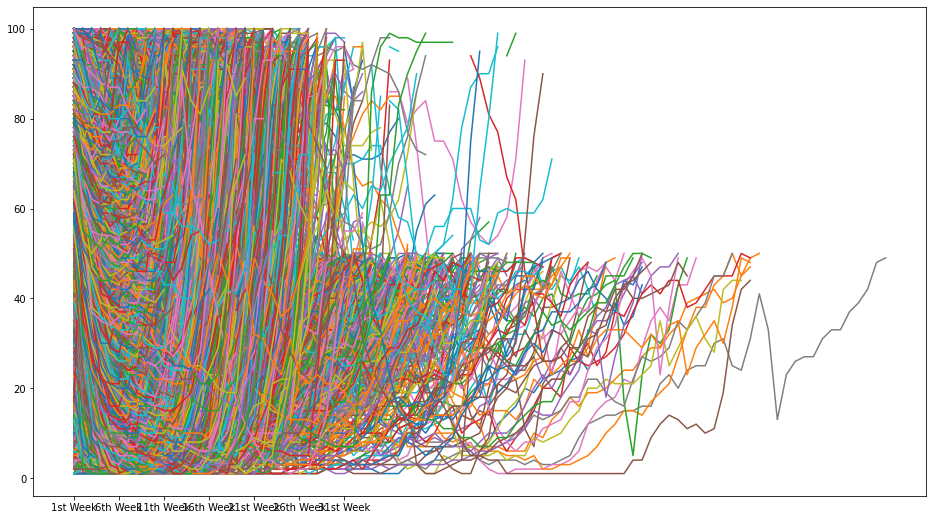

In [546]:
# # find odd characters in column names
# # doesn't work yet
# bad_column_name = []
# for col in df_main2.columns:
#     try:
#         df_main2[col].plot()
#     except Exception:
#         bad_column_name.append(col)
        
# bad_column_name

In [543]:
# Once column had $$ and matplotlib interprets these as Math text
df_main2.columns = df_main2.columns.str.replace('$$','SS', regex=False)

# # good method
# df.columns = df.columns.str.replace('[#,@,&]', '')

In [544]:
df_main2.iloc[:, 369]

1st Week     43.0
2nd Week     90.0
3rd Week     89.0
4th Week     89.0
5th Week     79.0
             ... 
87th Week     NaN
88th Week     NaN
89th Week     NaN
90th Week     NaN
91st Week     NaN
Name: BoSS -  369, Length: 91, dtype: float64

In [545]:
df_main2.plot()

<AxesSubplot:>

C:\Users\ejwda\Anaconda3\envs\PythonDataS2022\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 142 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ejwda\Anaconda3\envs\PythonDataS2022\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 154 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ejwda\Anaconda3\envs\PythonDataS2022\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 159 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ejwda\Anaconda3\envs\PythonDataS2022\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 143 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ejwda\Anaconda3\envs\PythonDataS2022\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 149 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ejwda\Anaconda3\envs\

ValueError: Image size of 933x599781 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1152x648 with 1 Axes>

## Checks for Unique records
<span id='unique_records'>

In [25]:
df[ (df.duplicated(subset=['Year', 'Artist', 'Featured', 'Track'], keep=False)) ]

,Year,Yearly Rank,Source,Prefix,CH,40,10,PK,High,Verified,Artist,Artist Inverted,Featured,UnFeatured,Album,...,77th Week,78th Week,79th Week,80th Week,81st Week,82nd Week,83rd Week,84th Week,85th Week,86th Week,87th Week,88th Week,89th Week,90th Week,91st Week
606,2013,35.0,h,2013_035,44.0,23.0,7.0,2.0,6,NaN,Anna Kendrick,"Kendrick, Anna",NaN,NaN,More From Pitch Perfect OST,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
608,2013,35.0,h,2013_035b,44.0,23.0,7.0,2.0,6,NaN,Anna Kendrick,"Kendrick, Anna",NaN,NaN,More From Pitch Perfect OST,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
671,2013,98.0,h,2013_098,3.0,3.0,0.0,1.0,21,NaN,Mariah Carey,"Carey, Mariah",NaN,NaN,Merry Christmas,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
690,2013,117.0,h,2013_117,3.0,3.0,0.0,2.0,26,NaN,Mariah Carey,"Carey, Mariah",NaN,NaN,Merry Christmas,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18177,1971,580.0,a,1971_580,1.0,0.0,0.0,1.0,95,NaN,"Assembled Multitude, The","Assembled Multitude, The",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18218,1971,621.0,a,1971_621,1.0,0.0,0.0,1.0,100,NaN,"Assembled Multitude, The","Assembled Multitude, The",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31775,1943,71.0,h,1943_055,4.0,NaN,NaN,NaN,12,NaN,Lucky Millinder & His Orchestra,"Millinder, Lucky Orch",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31823,1943,152.0,m,1943_103,1.0,NaN,NaN,NaN,20,NaN,Lucky Millinder & His Orchestra,"Millinder, Lucky Orch",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35245,1932,148.0,m,1932_148,4.0,NaN,NaN,NaN,13,NaN,Leo Reisman & His Orchestra,"Reisman, Leo Orch",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35271,1932,174.0,m,1932_174,4.0,NaN,NaN,NaN,15,NaN,Leo Reisman & His Orchestra,"Reisman, Leo Orch",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## SQL Setup

In [ ]:
# Table of People with id, alias
# Table of Songs with id_song

# Writer table with id and id_song
# Primary artist table with id and id_song
# Featured artist table with id and id_song

# song weekly stats with id_song
# song summary stats from weekly table with id_song

# song characteriestis with id_song

# band members with id_band, member, record type, effective date

